<a href="https://colab.research.google.com/github/Howl06/practice/blob/main/cnn_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [ ]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
trans = (
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck")				


cat


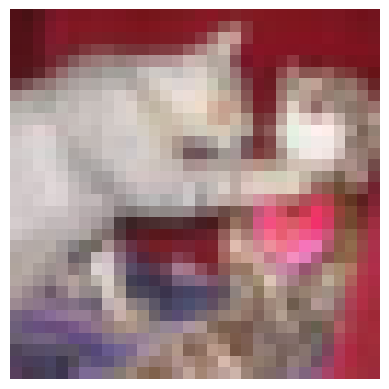

In [ ]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, 49999)
plt.axis("off")
print(trans[int(*y_train[c])])
plt.imshow(x_train[c])

In [ ]:
# 資料預處理 weight 調整
# 1. 題目預處理(Normalize)
# cnn 不需要攤開
x_train_nor = x_train/255 
x_test_nor = x_test/255 
# DEMO
x_test_nor[0]

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

In [ ]:
# 2.答案預處理(One-hot encoding)
# 跟mlp 一模一樣 因為cnn 最後還是做一次mlp
# 希望的樣子:[p0, p1,.....,p9] 1,2,3,4...0
# 5:[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
# 可能輸出:[0, 0, 0.2, 0, 0.8, 0, 0, 0, 0, 0]
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
# Dome
print("原來:", y_train[6])
print("後來:", y_train_cat[6])

原來: [2]
後來: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
from keras.models import Sequential
# mlp flatten 平坦層 最後攤開進到 mlp
from keras.layers import Dense, Flatten
# cnn
from keras.layers import Conv2D, MaxPooling2D
cnn = Sequential()
# Param filters 32 * kernel_size 3 * 3 * RGB 3 + 32 filters's bias
cnn.add(Conv2D(filters=32,
        kernel_size=(3, 3),
        padding="same",
        activation="relu", 
        input_shape=(32, 32 ,3)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# Param filters 64 * kernel_size 3 * 3 * last filters 32 + 64 filters's bias
cnn.add(Conv2D(filters=64,
        kernel_size=(3, 3),
        padding="same",
        activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# Param filters 128 * kernel_size 3 * 3 * last filters 64 + 128 filters's bias
cnn.add(Conv2D(filters=128,
        kernel_size=(3, 3),
        padding="same",
        activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(256, activation="relu"))
cnn.add(Dense(10, activation="softmax"))
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

In [ ]:
# 確定模型訓練方式....等
# 隨機梯度下降 (隨便選一組weight) (負梯度方向移動)
# loss: 最後輸出一個: binary_crossentropy 最後輸出多個 categorical_crossentropy
# lose: mse, mae continuous output
# optimizer: adam
cnn.compile(
    loss="categorical_crossentropy",
    metrics=["accuracy"],
    optimizer="adam")

In [ ]:
# batch 通常100~200 修正一次 看幾筆做一次梯度下降
# epochs: train full data times
# ex 60000 samples ,200 batch_size ,10 epochs , 60000 * 10 / 200 = 3000 edit_times
# verbose 去掉進度條
cnn.fit(
    x_train_nor,
    y_train_cat,
    batch_size=200,
    epochs=10,
    validation_split=0.1)
# val_loss validation_split

Epoch 1/10
225/225 [==============================] - 114s 492ms/step - loss: 1.5872 - accuracy: 0.4284 - val_loss: 1.3281 - val_accuracy: 0.5298
Epoch 2/10
225/225 [==============================] - 104s 462ms/step - loss: 1.1820 - accuracy: 0.5823 - val_loss: 1.0718 - val_accuracy: 0.6296
Epoch 3/10
225/225 [==============================] - 104s 462ms/step - loss: 1.0112 - accuracy: 0.6457 - val_loss: 0.9672 - val_accuracy: 0.6722
Epoch 4/10
225/225 [==============================] - 107s 476ms/step - loss: 0.8834 - accuracy: 0.6924 - val_loss: 0.8807 - val_accuracy: 0.7000
Epoch 5/10
225/225 [==============================] - 104s 462ms/step - loss: 0.8029 - accuracy: 0.7220 - val_loss: 0.8414 - val_accuracy: 0.7108
Epoch 6/10
225/225 [==============================] - 109s 484ms/step - loss: 0.7301 - accuracy: 0.7484 - val_loss: 0.8128 - val_accuracy: 0.7232
Epoch 7/10
225/225 [==============================] - 103s 460ms/step - loss: 0.6663 - accuracy: 0.7684 - val_loss: 0.8157 -

In [ ]:
cnn.evaluate(x_test_nor, y_test_cat)

313/313 [==============================] - 7s 22ms/step - loss: 0.7957 - accuracy: 0.7359


[0.7957453727722168, 0.7358999848365784]

In [ ]:
import numpy as np
import pandas as pd
'''
trans = (
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck")
'''	
# predictions = (mlp.predict(x_test_shape) > 0.5)
from sklearn.metrics import confusion_matrix
# argmax 最大值的索引值 axis = 選比較維度
predictions = np.argmax(cnn.predict(x_test_nor), axis=1)
predictions
pd.DataFrame(confusion_matrix(y_test,predictions))
# columns 欄位=錯誤標籤 row_欄位 = 正確標籤

313/313 [==============================] - 7s 22ms/step


,0,1,2,3,4,5,6,7,8,9
0,758,15,61,15,20,12,13,7,55,44
1,13,821,11,13,1,6,10,1,29,95
2,44,3,656,62,79,42,73,21,12,8
3,22,8,71,554,66,141,75,31,20,12
4,12,2,78,53,717,25,59,36,15,3
5,11,2,65,176,35,609,35,45,16,6
6,5,2,46,49,26,15,840,3,9,5
7,13,4,52,45,83,47,10,723,5,18
8,43,23,21,10,7,5,8,1,864,18
9,33,67,13,19,7,6,10,3,25,817


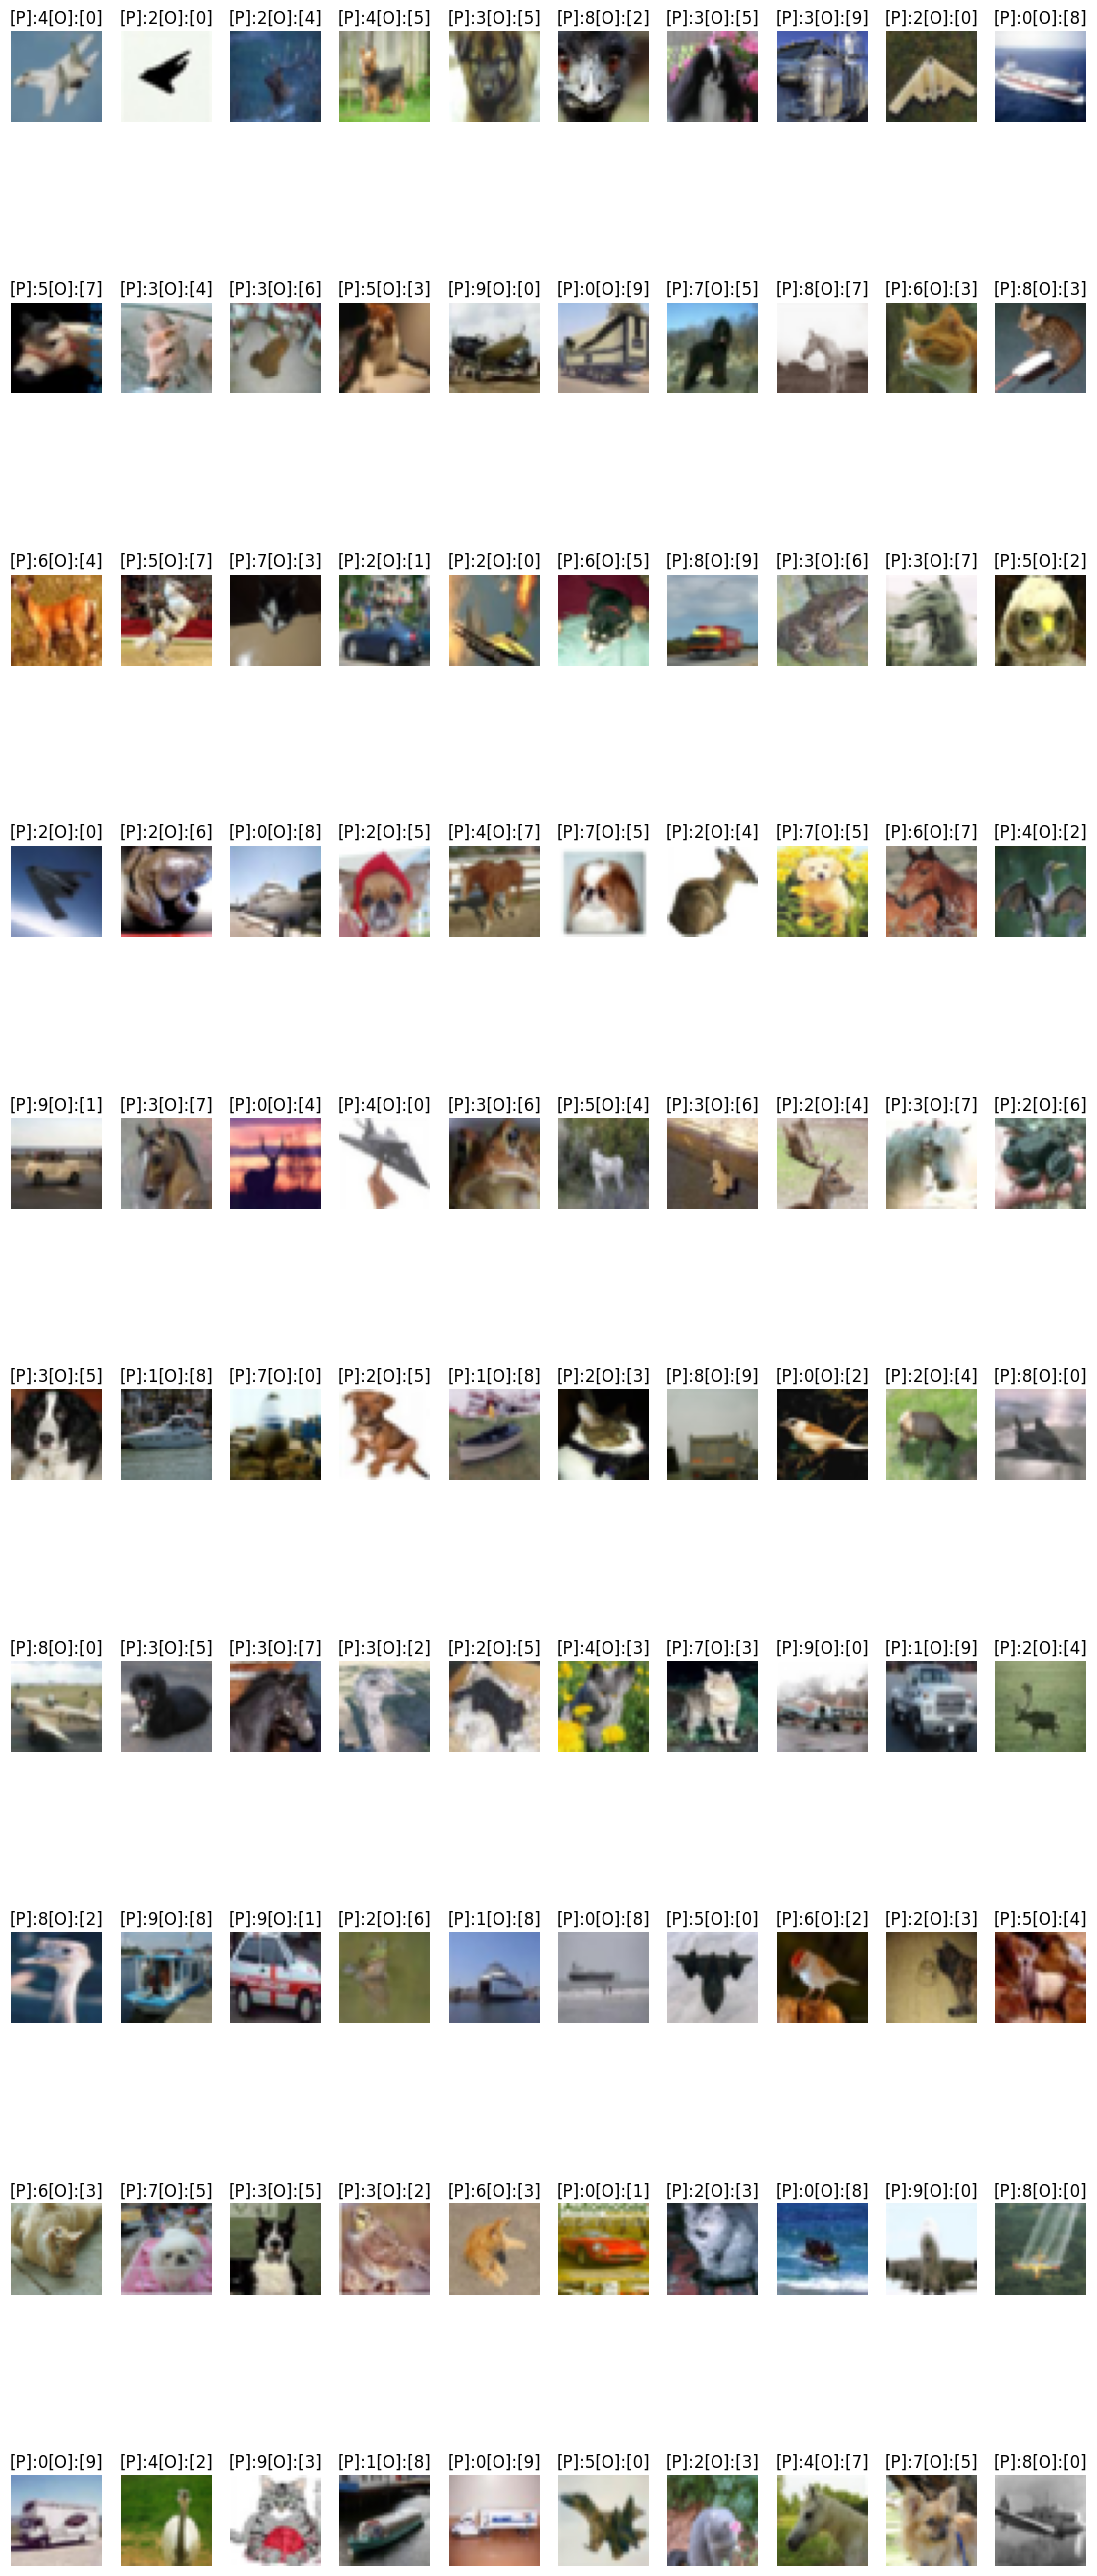

In [ ]:
# numpy 才能直接做每個數字做比較
# 找預測錯誤的index
# list: list[一個index]
# numpy: arraty[多個index]
y_test_dim = y_test.reshape(10000)
diff = np.nonzero(predictions != y_test_dim)
# predict error ,correct value
orifalse = y_test[diff]
# predict error ,predict value
prefalse = predictions[diff]
# 取出原始圖
imagefalse = x_test[diff]
plt.figure(figsize=(14, 35))
width = 10
# height = int(len(imagefalse)/10) + 1
height = 10
for (i, img) in enumerate(imagefalse[0:100]):

    plt.subplot(height, width, i + 1)
    plt.axis("off") # 去 x_axis, y_axis index
    t = "[P]:" + str(prefalse[i]) + "[O]:" + str(orifalse[i])
    plt.title(t)
    plt.imshow(img)
